In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [96]:
df = pd.read_csv('dataset.csv')
df = df[df['Number of Weeks On Top'] > 0]

# Calculate features evolutions

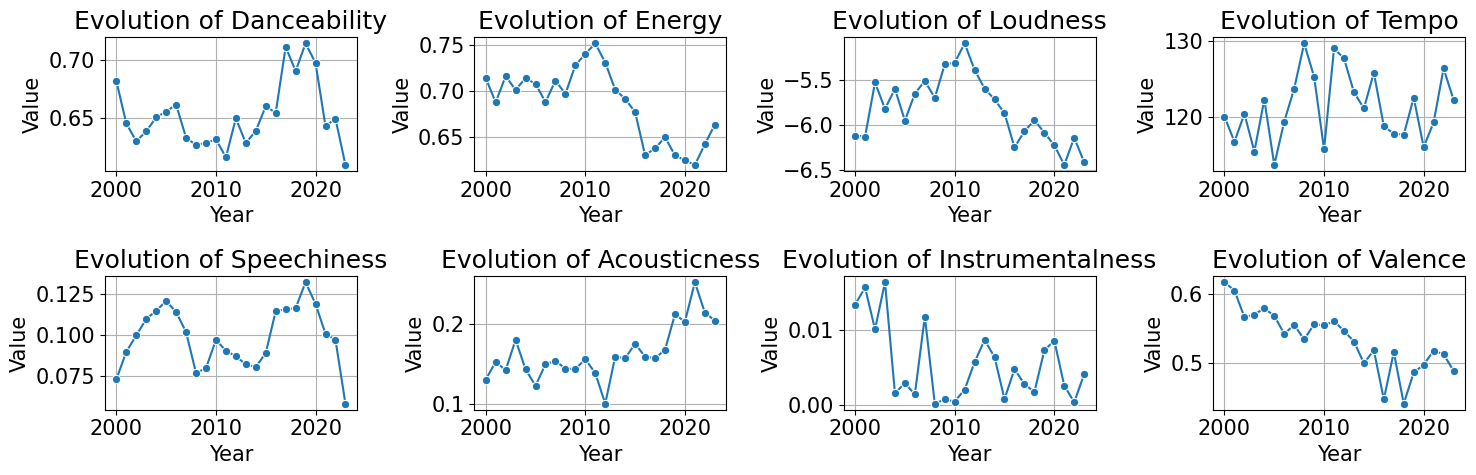

In [97]:
yearly_data = df.groupby('Year').agg({
    'tempo': 'mean',
    'danceability': 'mean',
    'energy': 'mean',
    'loudness': 'mean',
    'speechiness': 'mean',
    'acousticness': 'mean',
    'instrumentalness': 'mean',
    'valence': 'mean',
    'track_popularity': 'mean',
    'Number of Weeks On Top': 'mean'
}).reset_index()

fig, axes = plt.subplots(2, 4, figsize=(15, 5))
axes = axes.flatten()

features = ['danceability', 'energy', 'loudness', 'tempo', 'speechiness', 'acousticness', 'instrumentalness', 'valence']
for i, feature in enumerate(features):
    sns.lineplot(data=yearly_data, x='Year', y=feature, ax=axes[i], marker='o')
    axes[i].set_title(f'Evolution of {feature.capitalize()}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Value')
    axes[i].grid(True)

plt.tight_layout()
plt.show()


# Explore Decline of Energy

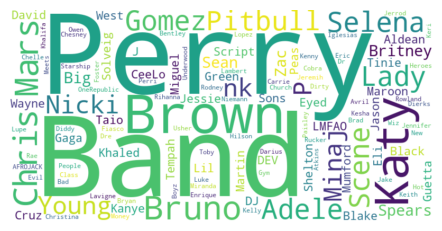

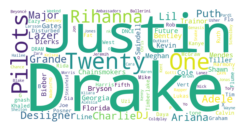

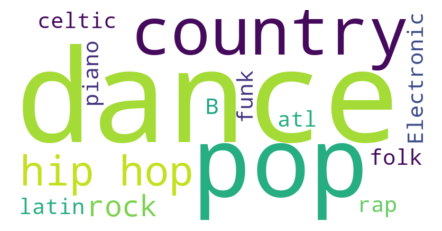

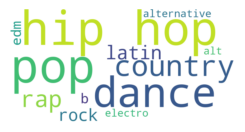

In [98]:
df_2011 = df[df['Year'] == 2011]
df_2016 = df[df['Year'] == 2016]

# Generate word clouds for top artists
wordcloud_2011 = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_2011['track_artist']))
wordcloud_2016 = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_2016['track_artist']))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_2011, interpolation='bilinear')
plt.axis('off')
plt.show()

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_2016, interpolation='bilinear')
plt.axis('off')
plt.show()

# Generate word clouds for top genres
wordcloud_genres_2011 = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_2011['genre']))
wordcloud_genres_2016 = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_2016['genre']))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_genres_2011, interpolation='bilinear')
plt.axis('off')
plt.show()

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_genres_2016, interpolation='bilinear')
plt.axis('off')
plt.show()

## 2011 analysis

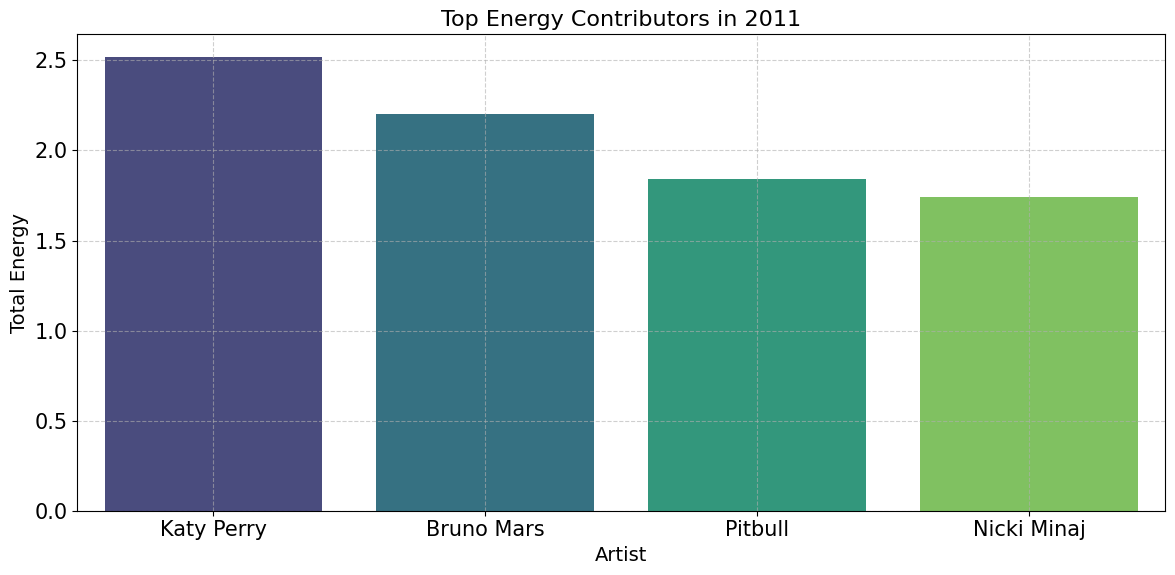

In [99]:
# Group by 'track_artist' and calculate the total and average energy
artist_energy_2011 = df_2011.groupby('track_artist').agg(
    Total_Energy=('energy', 'sum'),
    Average_Energy=('energy', 'mean'),
    Number_of_Hits=('track_artist', 'size')
).reset_index().sort_values(by='Total_Energy', ascending=False)[:4]

plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(12, 6))
sns.barplot(
    data=artist_energy_2011,
    x='track_artist',
    y='Total_Energy',
    palette='viridis',
    order=artist_energy_2011['track_artist']  # Explicitly order the bars
)
plt.title('Top Energy Contributors in 2011', fontsize=16)
plt.xlabel('Artist', fontsize=14)
plt.ylabel('Total Energy', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


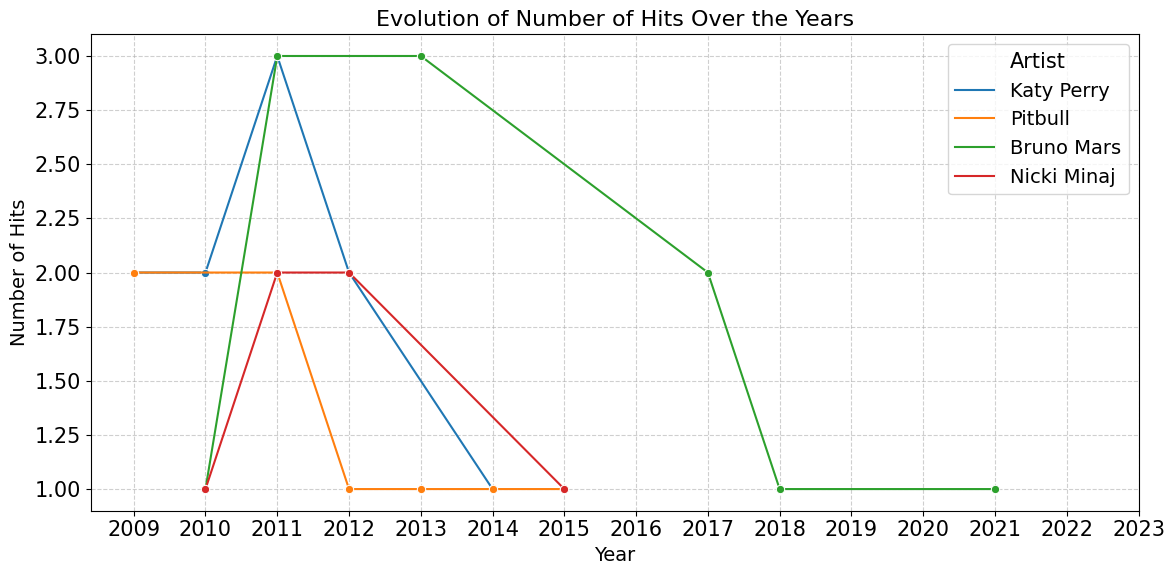

In [100]:
selected_artists = ['Bruno Mars', 'Pitbull', 'Nicki Minaj', 'Katy Perry']
df_selected = df[df['track_artist'].isin(selected_artists)]

# Group by 'track_artist' and find the first year of appearance
first_year_df = df_selected.groupby('track_artist')['Year'].min().reset_index()

# Ensure all years from 2009 to 2023 are represented
all_years = pd.DataFrame({'Year': range(2009, 2024)})
hits_per_year = (
    df_selected.groupby(['Year', 'track_artist'])
    .size()
    .reset_index(name='Number of Hits')
    .merge(all_years, on='Year', how='right')
    .fillna({'Number of Hits': 0, 'track_artist': 'No Data'})
)

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=hits_per_year[hits_per_year['track_artist'] != 'No Data'],
    x='Year',
    y='Number of Hits',
    hue='track_artist',
    marker='o'
)
plt.title('Evolution of Number of Hits Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Hits', fontsize=14)
plt.legend(title='Artist', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(range(2009, 2024))  # Ensure x-axis includes all years from 2009 to 2023
plt.tight_layout()
plt.show()


## 2016 analysis

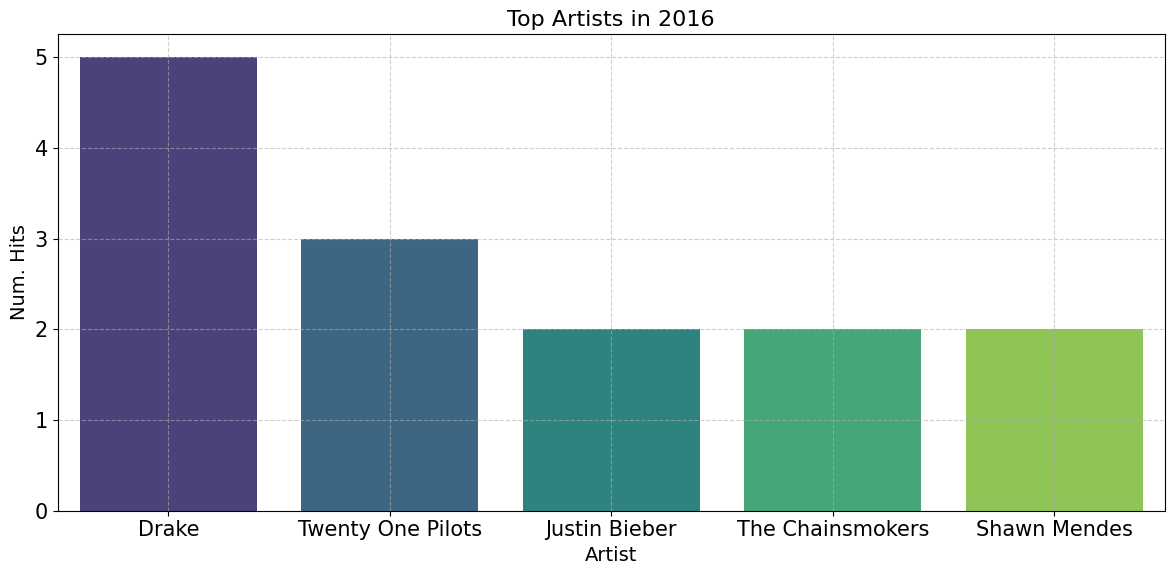

In [101]:
# Group by 'track_artist' and calculate the total and average energy
top_artists_2016 = df_2016.groupby('track_artist').agg(
    Number_of_Hits=('track_artist', 'size')
).reset_index()

top_artists_2016 = top_artists_2016[top_artists_2016['Number_of_Hits'] > 1].sort_values(by='Number_of_Hits', ascending=False)[:5]

plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_artists_2016,
    x='track_artist',
    y='Number_of_Hits',
    palette='viridis'
)
plt.title('Top Artists in 2016', fontsize=16)
plt.xlabel('Artist', fontsize=14)
plt.ylabel('Num. Hits', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

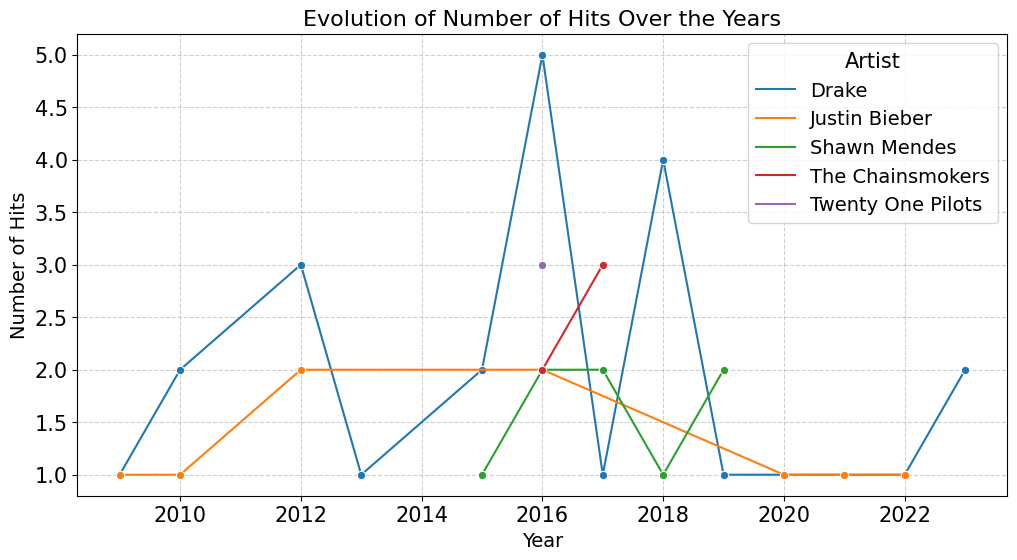

In [102]:
selected_artists = ['Drake', 'Twenty One Pilots', 'Justin Bieber', 'The Chainsmokers', 'Shawn Mendes']
df_selected = df[df['track_artist'].isin(selected_artists)]

# Group by 'track_artist' and find the first year of appearance
first_year_df = df_selected.groupby('track_artist')['Year'].min().reset_index()

# Group by 'Year' and 'track_artist' to count the number of hits per year
hits_per_year = df_selected.groupby(['Year', 'track_artist']).size().reset_index(name='Number of Hits')

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=hits_per_year,
    x='Year',
    y='Number of Hits',
    hue='track_artist',
    marker='o'
)
plt.title('Evolution of Number of Hits Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Hits', fontsize=14)
plt.legend(title='Artist', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Mean features of top artists (futher explored in another script)

In [103]:
features = ['danceability', 'energy', 'loudness', 'tempo', 'speechiness', 'acousticness', 'instrumentalness', 'valence']
artist_features_mean = df_selected.groupby('track_artist')[features].mean().reset_index()
print(artist_features_mean)


        track_artist  danceability    energy  loudness       tempo  \
0              Drake      0.688458  0.565333 -7.672917  129.327333   
1      Justin Bieber      0.672667  0.695111 -5.450000  115.560889   
2       Shawn Mendes      0.674000  0.735000 -5.547875  129.293500   
3   The Chainsmokers      0.659600  0.642000 -5.897800  110.566400   
4  Twenty One Pilots      0.703667  0.582000 -6.793333  111.663333   

   speechiness  acousticness  instrumentalness   valence  
0     0.186421      0.116853          0.004157  0.390725  
1     0.114811      0.215600          0.000229  0.549556  
2     0.091138      0.099300          0.000000  0.676000  
3     0.060340      0.211260          0.001019  0.481800  
4     0.069633      0.046217          0.000020  0.587333  


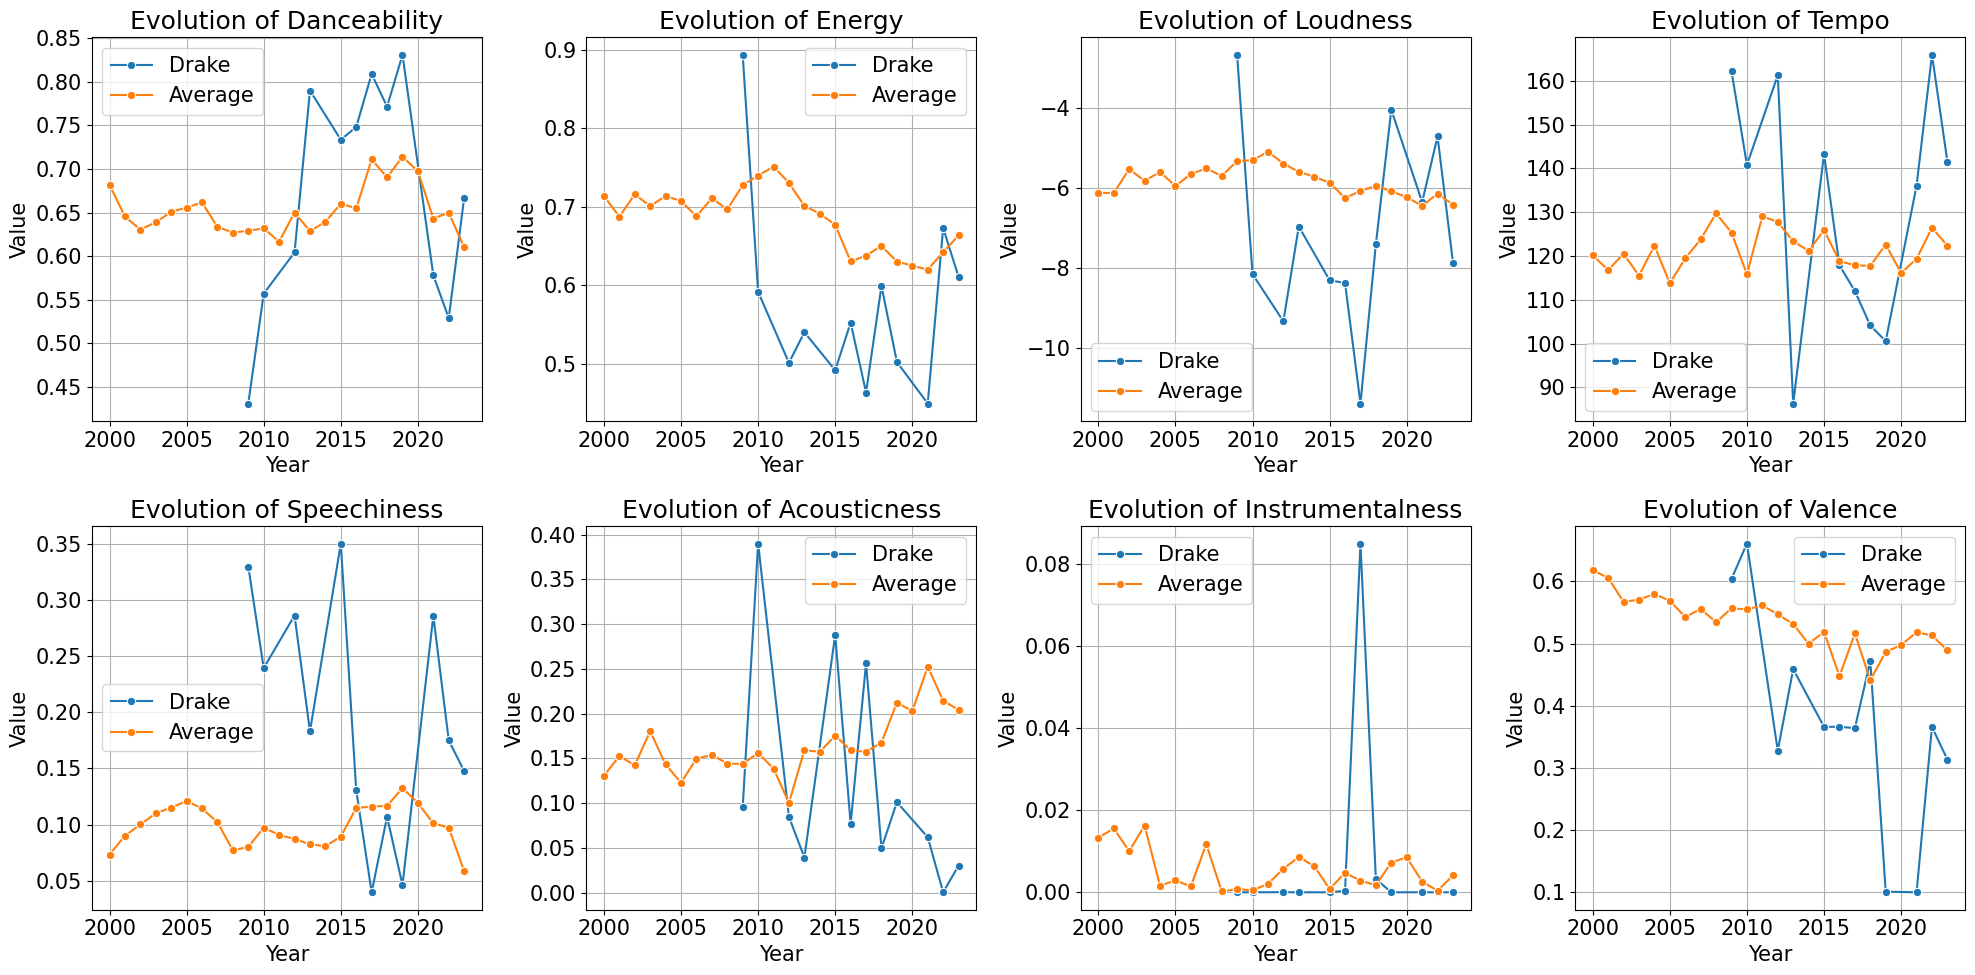

In [104]:
# Group the data for Drake and the entire dataset
drake_yearly_data = df[df['track_artist'] == 'Drake'].groupby('Year').agg({
    'tempo': 'mean',
    'danceability': 'mean',
    'energy': 'mean',
    'loudness': 'mean',
    'speechiness': 'mean',
    'acousticness': 'mean',
    'instrumentalness': 'mean',
    'valence': 'mean',
}).reset_index()

overall_yearly_data = df.groupby('Year').agg({
    'tempo': 'mean',
    'danceability': 'mean',
    'energy': 'mean',
    'loudness': 'mean',
    'speechiness': 'mean',
    'acousticness': 'mean',
    'instrumentalness': 'mean',
    'valence': 'mean',
}).reset_index()

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()
for i, feature in enumerate(features):
    sns.lineplot(data=drake_yearly_data, x='Year', y=feature, ax=axes[i], marker='o', label='Drake')
    sns.lineplot(data=overall_yearly_data, x='Year', y=feature, ax=axes[i], marker='o', label='Average')
    
    axes[i].set_title(f'Evolution of {feature.capitalize()}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Value')
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()